## TSP Dantzig–Fulkerson–Johnson (DFJ) formulation

$ \text{Variables} $

$x_{ij}={\begin{cases}1&{\text{the path goes from city }}i{\text{ to city }}j\\0&{\text{otherwise}}\end{cases}}$

\begin{equation*}
\begin{aligned}
& \underset{}{\text{minimize}}
& & \sum_{i=1}^{n} \sum_{j=1, j\neq i}^{n} c_{ij} x_{ij} \\
& \text{subject to}
& & \sum_{j=1, j\neq i}^{n} x_{ij} = 1, \quad i = 1,\ldots,n, \\
& 
& & \sum_{i=1, i\neq j}^{n} x_{ij} = 1, \quad j = 1,\ldots,n, \\
& 
& & \sum_{i \in Q} \sum_{j\neq i, j \in Q,} x_{ij} \leq |Q| - 1, \quad \forall Q \subset{1,...,n},|Q| \ge 2 \\
&
& & x_{ij} \in \{0,1\}, \quad i,j = 1,\ldots,n, \, i\neq j, \\
\end{aligned}
\end{equation*}


In [1]:
########################################## Import library and model enviroment ############################################

from docplex.mp.model import Model
import networkx as nx   
import numpy as np
import matplotlib.pyplot as plt

mdl=Model('modelo')

In [2]:
def graphic(x,d,N):
    edges = []
    for i in N:
        for j in N:
            if i != j and x[i,j] > 0.5: # Este es un valor de tolerancia, puede ajustarse según la necesidad
                edges.append((i, j, d[i-1][j-1]))
    # Crear un grafo de NetworkX
    G = nx.Graph()
    for edge in edges:
        G.add_edge(edge[0], edge[1], weight=edge[2])

    plt.figure(figsize=(10, 10))
    # Dibujar el grafo
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True)
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    # Mostrar el gráfico
    plt.show()

In [3]:
#Create a Random Matrix
C = np.random.randint(1, 100, size=(50, 50))
# A_i,i = 0
np.fill_diagonal(C, 0)

In [4]:
#Parameters
Nodes=len(C)

In [5]:
#Sets
N=[i+1 for i in range(Nodes)]#i+1
#print(n)

In [6]:
#Index
Ind={(i,j) for i in N for j in N if i!=j}
#print(Ind)

In [7]:
#Variables
x=mdl.binary_var_dict(Ind, name='x')

In [8]:
mdl.minimize(mdl.sum(x[i,j]*C[i-1][j-1] for i in N for j in N if i!=j))

In [9]:
for i in N:
    mdl.add_constraint(mdl.sum(x[i,j] for j in N if i!=j)==1)

In [10]:
for j in N:
    mdl.add_constraint(mdl.sum(x[i,j] for i in N if i!=j)==1)

In [11]:
def find_subtours(sol):
    subtours = []
    remaining_nodes = list(range(1,len(sol)+1)) #[i+1 for i in range(len(sol))]
    print(remaining_nodes)
    while len(remaining_nodes) > 0:
        subtour = []
        subtours.append(subtour)
        start = remaining_nodes[0]
        while True:
            subtour.append(start)
            if start in remaining_nodes:
                remaining_nodes.remove(start)
            next_node = next((j for (i, j), value in sol.items() if i == start and value > 0.5), None)
            if next_node is None or next_node not in remaining_nodes:
                break
            start = next_node
    return subtours

Version identifier: 12.10.0.0 | 2019-11-26 | 843d4de2ae
CPXPARAM_Read_DataCheck                          1
CPXPARAM_RandomSeed                              201903125
Found incumbent of value 2407.000000 after 0.02 sec. (0.18 ticks)
Found incumbent of value 393.000000 after 0.02 sec. (0.25 ticks)
Tried aggregator 1 time.
Reduced MIP has 100 rows, 2450 columns, and 4900 nonzeros.
Reduced MIP has 2450 binaries, 0 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.00 sec. (3.13 ticks)
Tried aggregator 1 time.
Detecting symmetries...
Reduced MIP has 100 rows, 2450 columns, and 4900 nonzeros.
Reduced MIP has 2450 binaries, 0 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.02 sec. (3.61 ticks)
Probing time = 0.00 sec. (2.93 ticks)
Clique table members: 100.
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic search.
Parallel mode: deterministic, using up to 8 threads.
Root relaxation solution time = 0.00 sec. (1.44 ticks)

        Nodes                       

Tried aggregator 1 time.
Detecting symmetries...
Reduced MIP has 109 rows, 2450 columns, and 6170 nonzeros.
Reduced MIP has 2450 binaries, 0 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.00 sec. (4.55 ticks)
Probing time = 0.00 sec. (2.89 ticks)
Clique table members: 100.
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic search.
Parallel mode: deterministic, using up to 8 threads.
Root relaxation solution time = 0.02 sec. (2.71 ticks)

        Nodes                                         Cuts/
   Node  Left     Objective  IInf  Best Integer    Best Bound    ItCnt     Gap

*     0+    0                          186.0000        0.0000           100.00%
      0     0      184.7500    43      186.0000      184.7500       78    0.67%
      0     0        cutoff            186.0000                     81    0.00%
Elapsed time = 0.06 sec. (23.89 ticks, tree = 0.01 MB, solutions = 12)

Root node processing (before b&c):
  Real time             =    0.06 sec.

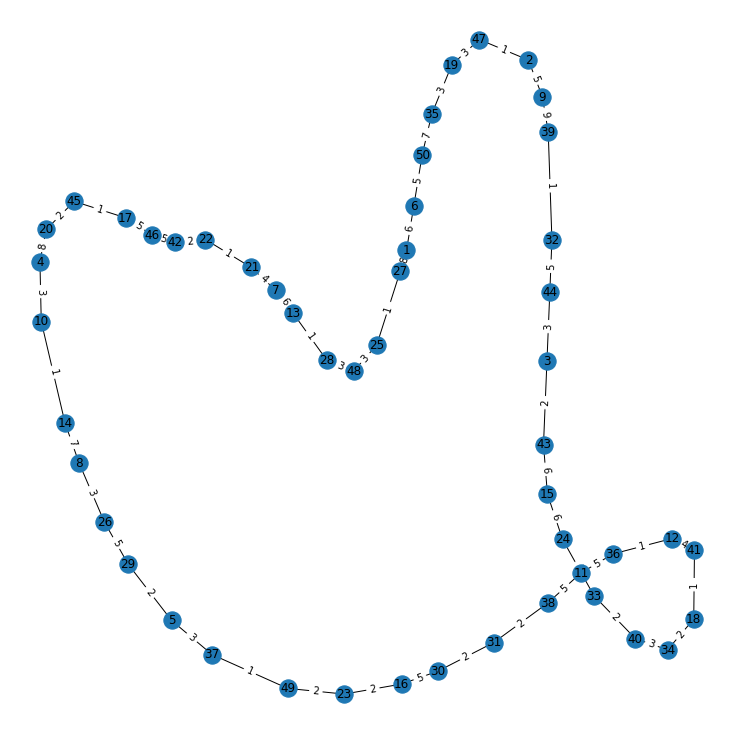

Objective Value: 186


In [12]:
while True:
    solution = mdl.solve(log_output=True)
    if solution is None:
        print("No se encontró una solución")
        break
    sol = solution.get_value_dict(x, keep_zeros=False)
    subtours = find_subtours(sol)
    print("El subtour es...",subtours)
    if len(subtours) > 1:
        for subtour in subtours:
            if len(subtour) < Nodes:
                mdl.add_constraint(mdl.sum(x[i, j] for i in subtour for j in subtour if i != j) <= len(subtour) - 1)
    else:
        break

print(solution)

solution = mdl.solve(log_output=True)
valor_objetivo = mdl.solution.get_objective_value()
x=solution.get_value_dict(x, keep_zeros=True, precision=1)


graphic(x,C,N)

print("Objective Value:",valor_objetivo)

$Literature$

https://en.wikipedia.org/wiki/Travelling_salesman_problem#cite_note-19